In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the file and print the first 5 rows
lp=pd.read_csv("loan prediction.csv")
lp.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#print the number of rows and columns using shape function
lp.shape

#here the number of rows is 614 and the number of columns is 13

(614, 13)

In [4]:
#print the consice summary of the dataframe
lp.info()

#here the info function gives an idea regarding the number of non null values and datatypes of the column; it also shows how many types of data are present.
#here there are 4 float data, 1 integer data and 8 object datas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#describe function tells us the statistical findings like mean, percentile etc
lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain  614 entries.

mean- Mean of Values here mean of each column is found ie, mean of ApplicantIncome  column= 5403.459, LoanAmount is 146.4121 etc

std- Standard Deviation of the Values here stnadard deviation for ApplicatnIncome is 6109.041673, Loan_Amount_Term is 65.12041 etc

min- Minimum value here it shows the min value for ApplicantIncome is 150 , for LoanAmount is 9.00 etc

max- Maximum value it shows the max value for ApplicantIncome as 81000, for LoanAmount is 700 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for ApplicantIncome it is 2877.5000, 3812.5000 , and 5795.000 respectively

In [6]:
#check the data types of the columns 
lp.dtypes

#here there are object, float and integer data types in the dataset given.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#check the names of columns
lp.columns

#below are the list of the column names of the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#group by data types
lp.columns.to_series().groupby(lp.dtypes).groups

#we have grouped the dataset on the basis of integer, float and object 

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [9]:
#check whether there is any null value
lp.isnull().sum()

#here we can see that there are null values in Gender, Married, Dependents, Self employed, loan amount,loan_amount_term, credit_history

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

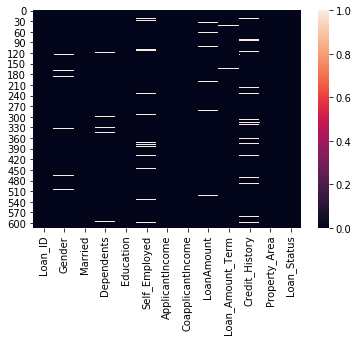

In [10]:
#using heatmap lets check whether there is any null value
sns.heatmap(lp.isnull())


#from the above cell we saw that there are many null values; below are the visualization of the same using heatmap

From the above heatmap it is clear that there are null values in gender, dependents,self_emplyed, loanAmount, credit_history, and loan_amount_term

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AC71CAA88>,
      dtype=object)

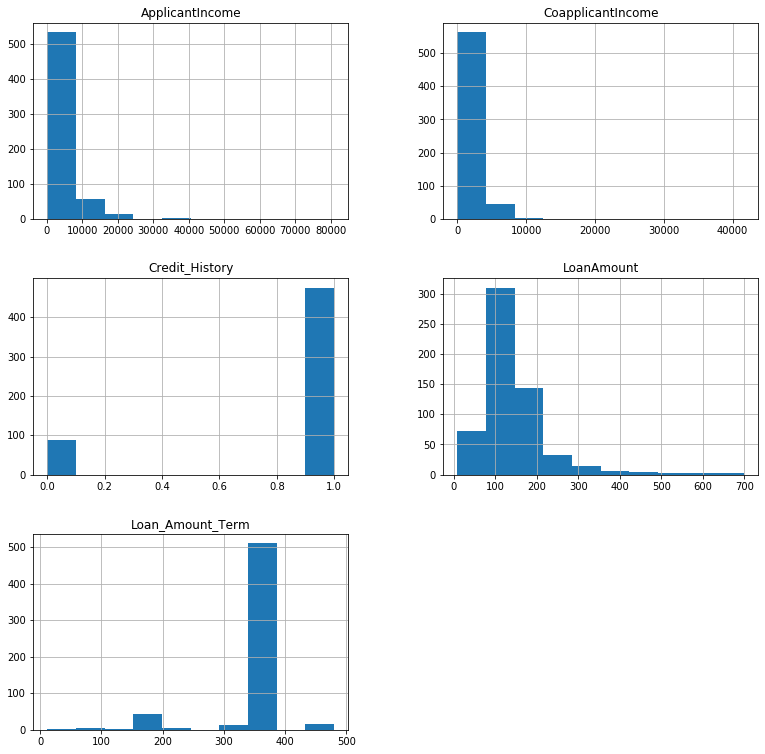

In [11]:
#histogram representation of the dataset
lp.hist(figsize=(13,13))

In [12]:
#lets fill the missing values one by one
lp['Gender'].fillna('Male',inplace=True)
lp['Gender'].mode()

0    Male
dtype: object

In [13]:
lp['Married'].fillna('yes',inplace=True)
lp['Married'].mode()

0    Yes
dtype: object

In [14]:

lp['Dependents'].fillna(0,inplace=True)
lp['Dependents'].mode()

0    0
dtype: object

In [15]:
lp['Self_Employed'].fillna('No',inplace=True)
lp['Self_Employed'].mode()

0    No
dtype: object

In [16]:
lp['Loan_Amount_Term'].fillna(lp['Loan_Amount_Term'].mean(),inplace=True)
lp['LoanAmount'].fillna(lp['LoanAmount'].mean(),inplace=True)

In [17]:
lp['Credit_History'].fillna(1.0,inplace=True)
lp['Credit_History'].mode()

0    1.0
dtype: float64

In [18]:
#now lets check whether there are any more null values
lp.isnull().sum()

#after filling the null values using mode we can see that now there are no more null values in the dataset.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#drop loan id column which is irrelevant
lp.drop(['Loan_ID'],axis=1,inplace=True)

In [20]:
lp_object=lp[['Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status']].copy()

In [21]:
lp_object.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [22]:
#using for loop to count each entity
for i in lp_object:
      print("column_name = ",i)
      print(lp_object[i].value_counts())
      print("\n")


column_name =  Gender
Male      502
Female    112
Name: Gender, dtype: int64


column_name =  Married
Yes    398
No     213
yes      3
Name: Married, dtype: int64


column_name =  Dependents
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64


column_name =  Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


column_name =  Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


column_name =  Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


column_name =  Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




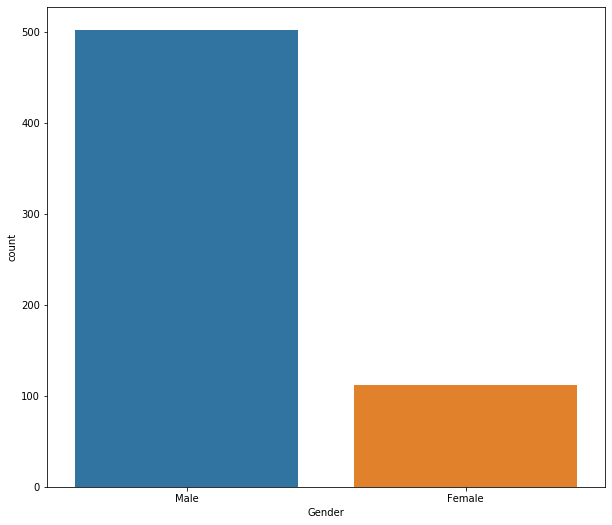

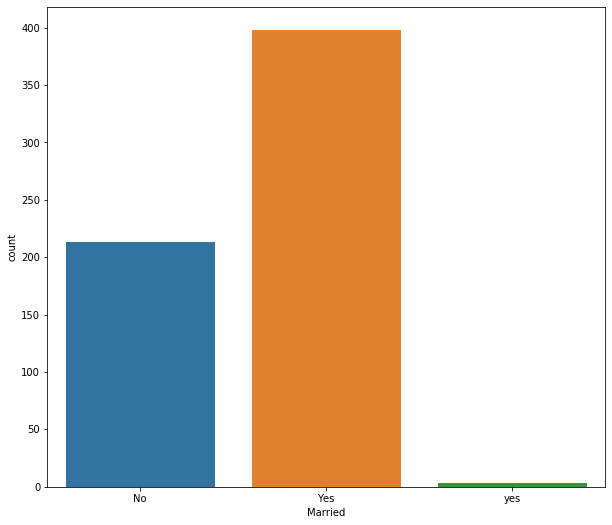

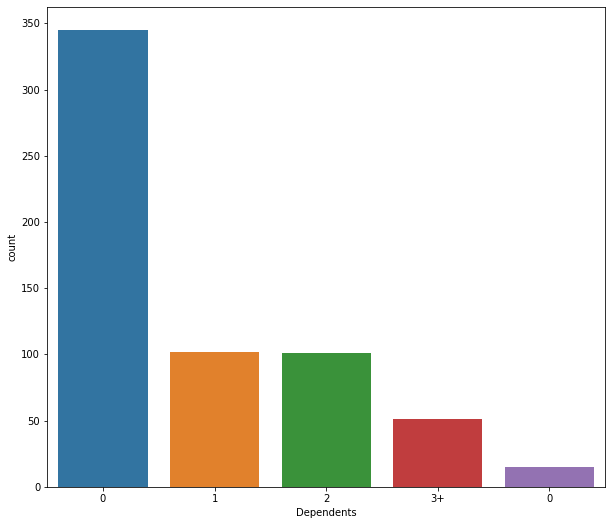

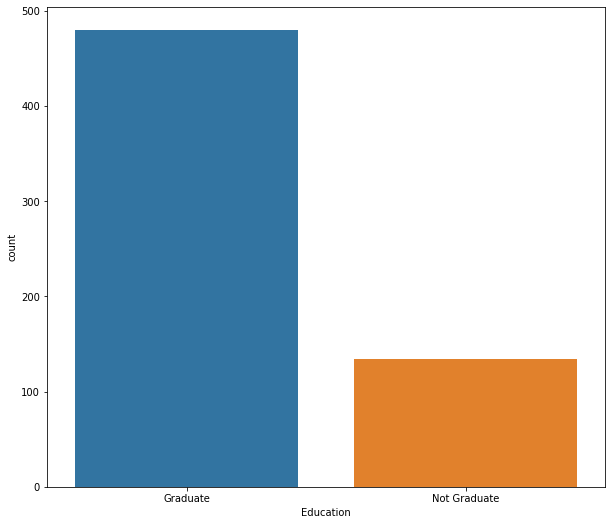

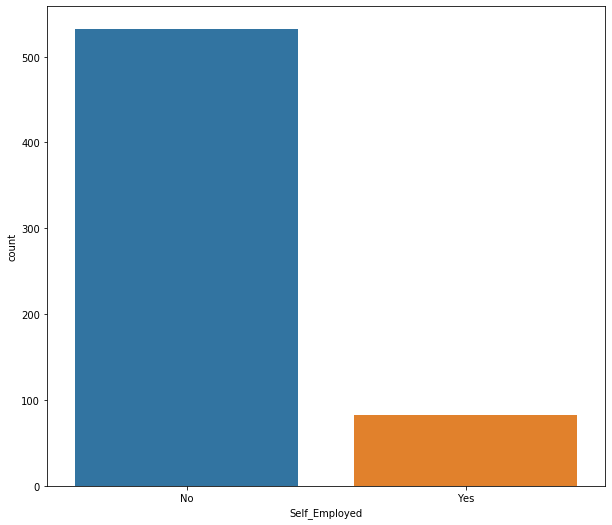

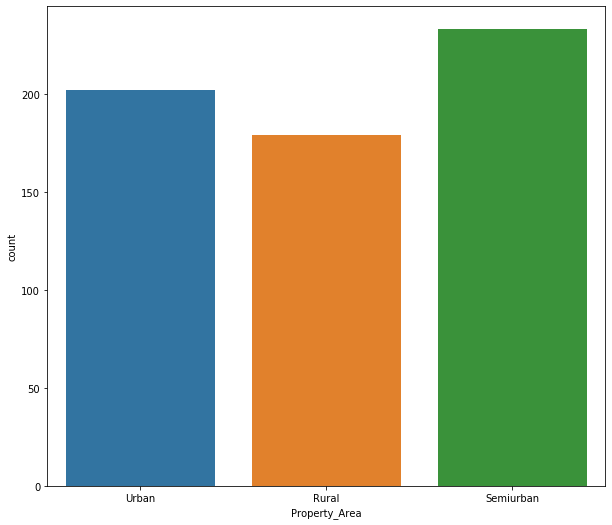

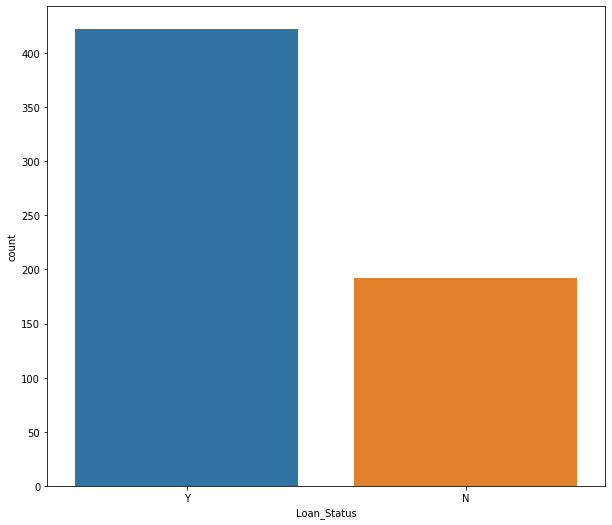

In [23]:
#lets plot it in a graph for better understanding 
for i in lp_object:
    plt.figure(figsize=(10,30))
    plt.subplot(311)
    sns.countplot(lp_object[i])

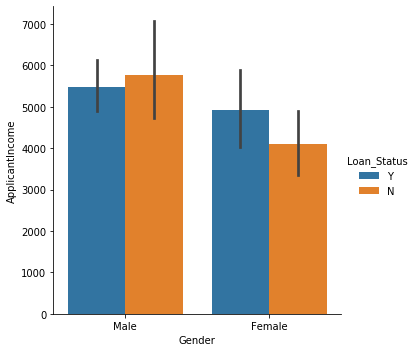

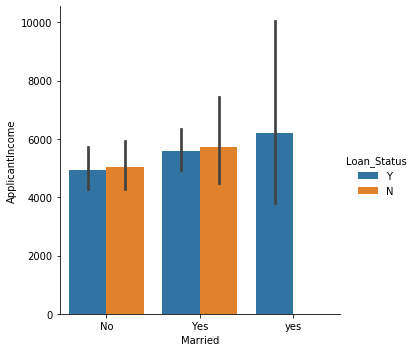

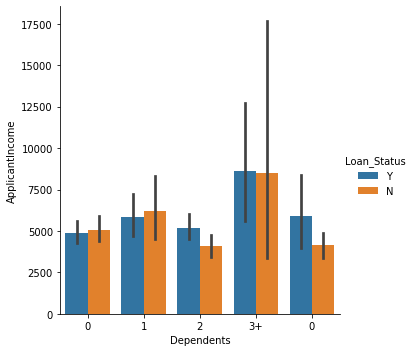

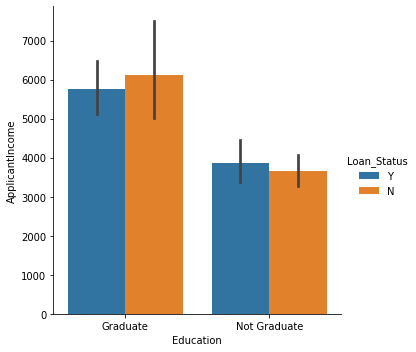

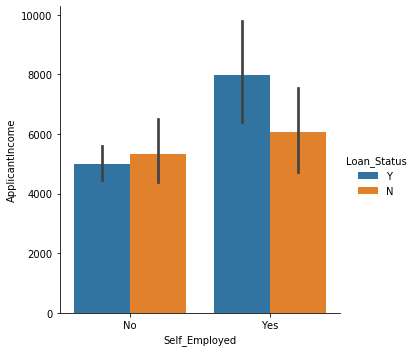

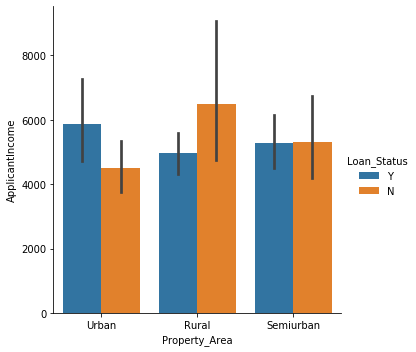

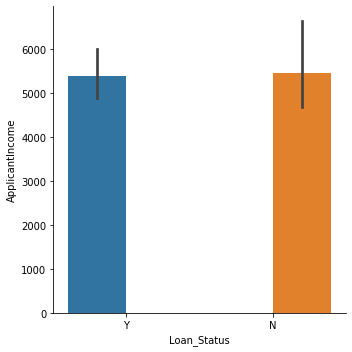

In [24]:

for i in lp_object:
    sns.catplot(x=i, y='ApplicantIncome',hue='Loan_Status',data=lp,kind="bar")

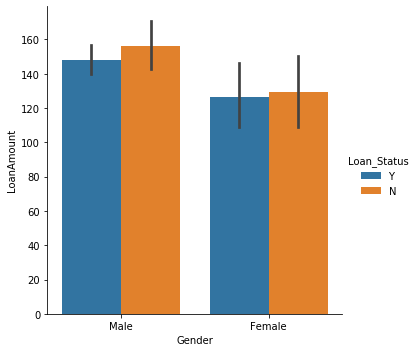

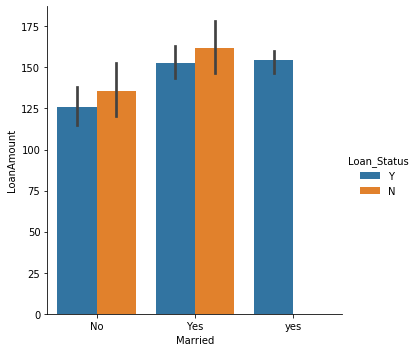

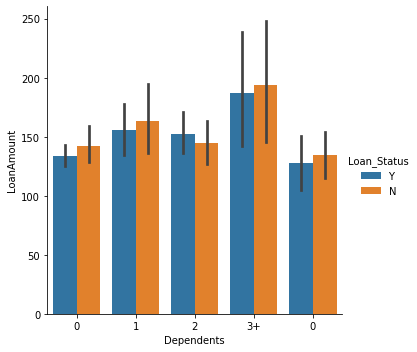

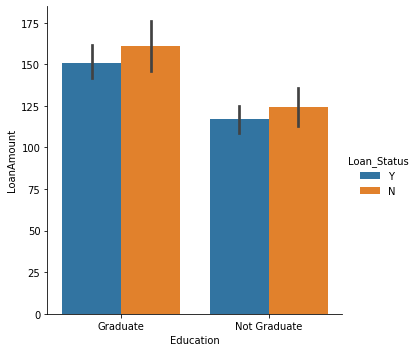

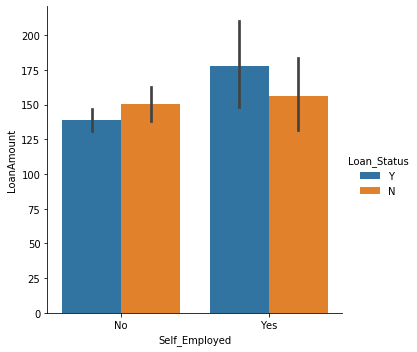

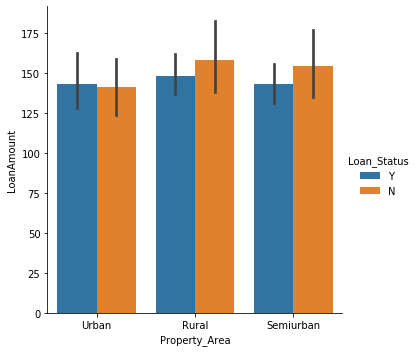

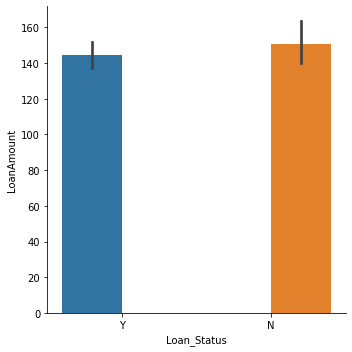

In [25]:


for i in lp_object:
    sns.catplot(x=i, y='LoanAmount',hue='Loan_Status',data=lp,kind='bar')

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lp_object['Married']=le.fit_transform(lp_object['Married'])
lp_object['Gender']=le.fit_transform(lp_object['Gender'])
lp_object['Education']=le.fit_transform(lp_object['Education'])
lp_object['Self_Employed']=le.fit_transform(lp_object['Self_Employed'])
lp_object['Loan_Status']=le.fit_transform(lp_object['Loan_Status'])

In [27]:
lp_object.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,Urban,1
1,1,1,1,0,0,Rural,0
2,1,1,0,0,1,Urban,1
3,1,1,0,1,0,Urban,1
4,1,0,0,0,0,Urban,1


In [28]:
lp_object= pd.get_dummies(lp_object, drop_first=True)
lp_object.head()

,Gender,Married,Education,Self_Employed,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,1,0,0,0,0
2,1,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,1,1,0,0,0,0,1
4,1,0,0,0,1,1,0,0,0,0,1


In [29]:
#lets see the object type columns
lp_object.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [30]:
#integer valued columns
lp_int=lp[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History','ApplicantIncome']]

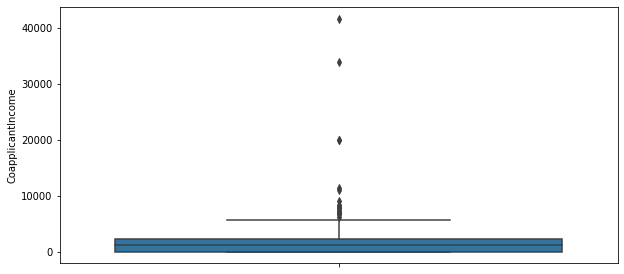

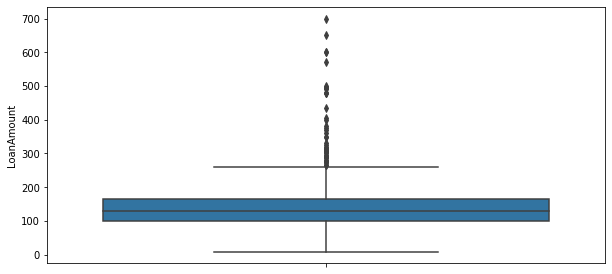

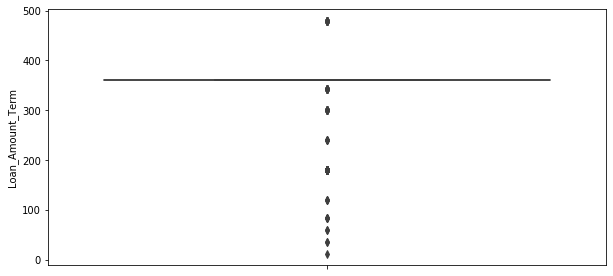

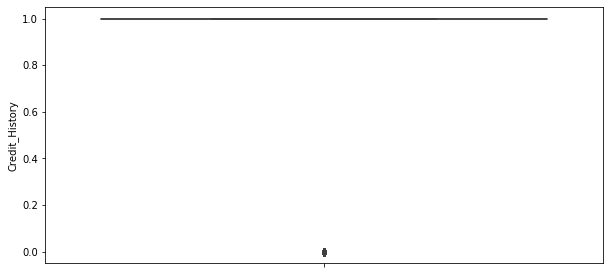

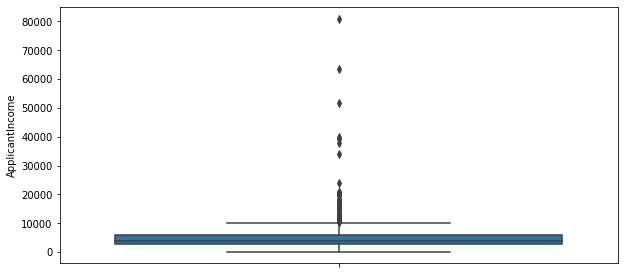

In [31]:
#plotting integer type values in box plot
for i in lp_int:
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    sns.boxplot(lp_int[i],orient='v')

In [32]:
#concating the data

lp_final=pd.concat([lp_int,lp_object],axis=1)
lp_final.shape

(614, 16)

In [33]:
lp_final.skew()

CoapplicantIncome          7.491531
LoanAmount                 2.726601
Loan_Amount_Term          -2.389680
Credit_History            -2.021971
ApplicantIncome            6.539513
Gender                    -1.648795
Married                   -0.538097
Education                  1.367622
Self_Employed              2.159796
Loan_Status               -0.809998
Dependents_0              -0.250087
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

In [34]:
x=lp_final.drop(['Loan_Status'],axis=1)
x.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome,Gender,Married,Education,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,0.0,146.412162,360.0,1.0,5849,1,0,0,0,1,0,0,0,0,1
1,1508.0,128.000000,360.0,1.0,4583,1,1,0,0,0,1,0,0,0,0
2,0.0,66.000000,360.0,1.0,3000,1,1,0,1,1,0,0,0,0,1
3,2358.0,120.000000,360.0,1.0,2583,1,1,1,0,1,0,0,0,0,1
4,0.0,141.000000,360.0,1.0,6000,1,0,0,0,1,0,0,0,0,1


In [35]:
#Using standard scaling

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [36]:
from sklearn.decomposition import PCA
pca=PCA(8)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [37]:
y=lp_final['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32



In this dataset the aim was to check the loan approval prediction which is either 0 or 1 which means no or yes respectively. It is categorial in nature and hence we are using Logistic Regression.

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)

In [39]:
print(x_train.shape,x_test.shape)

print(y_train.shape,y_test.shape)

(491, 8) (123, 8)
(491,) (123,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [41]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=26)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=26)
GBC=GradientBoostingClassifier(random_state=26)
ABC=AdaBoostClassifier(random_state=26)
ETC=ExtraTreesClassifier(random_state=26)

In [42]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.7560975609756098


Cross_Val_Score =  0.7786356425171868


roc_auc_score =  0.6270897832817338


classification_report
               precision    recall  f1-score   support

           0       0.79      0.29      0.42        38
           1       0.75      0.96      0.85        85

    accuracy                           0.76       123
   macro avg       0.77      0.63      0.63       123
weighted avg       0.76      0.76      0.71       123



[[11 27]
 [ 3 82]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
 

AxesSubplot(0.125,0.808774;0.62x0.0712264)





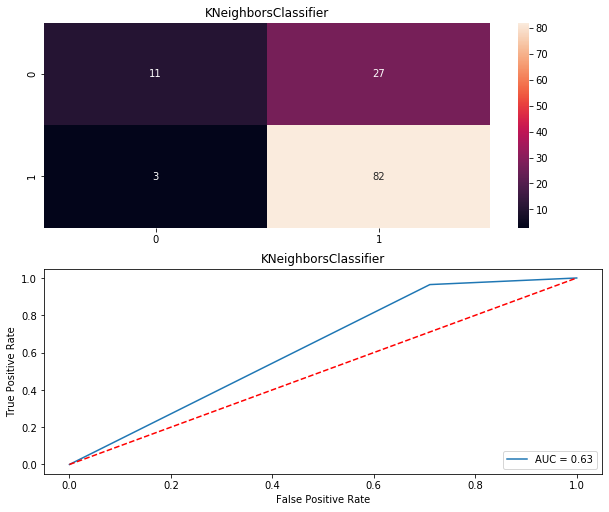

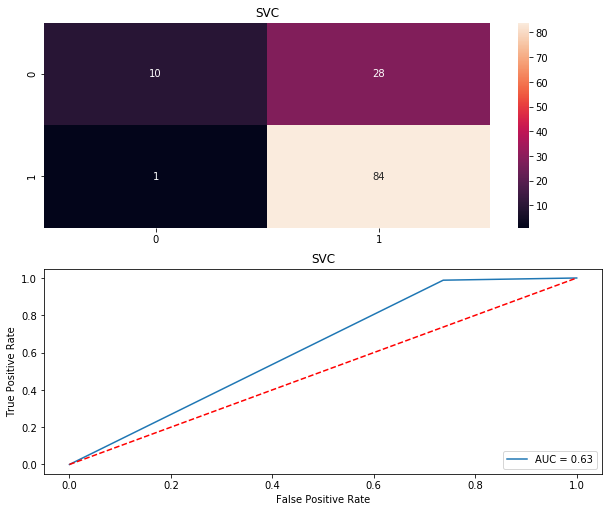

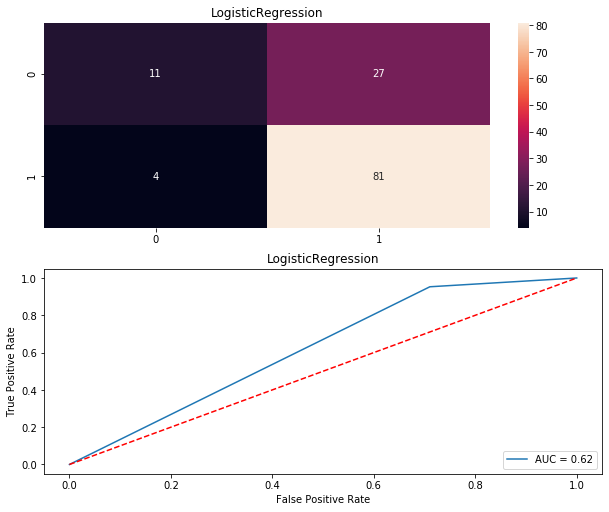

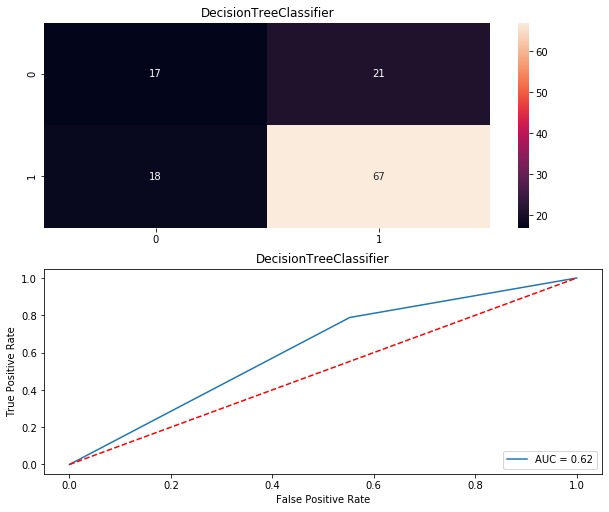

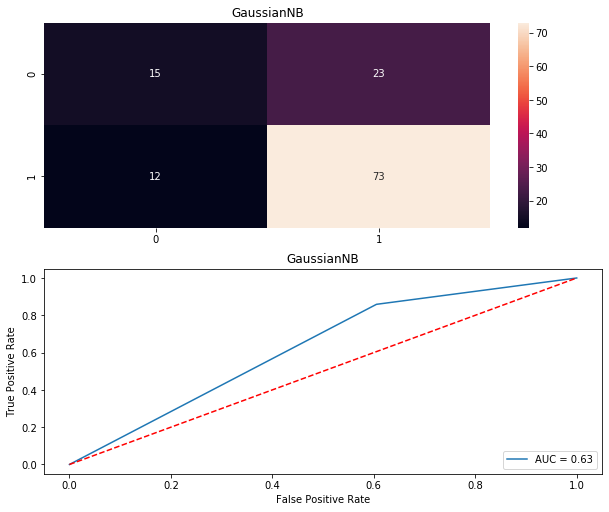

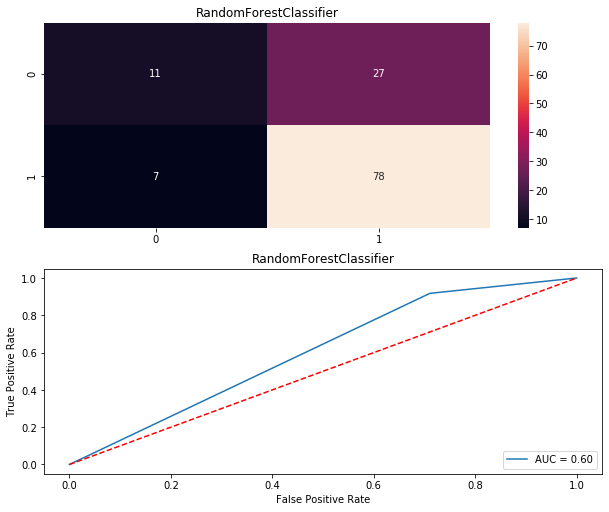

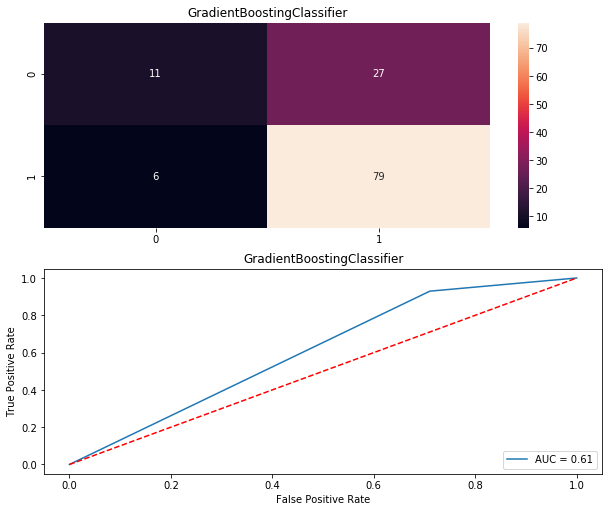

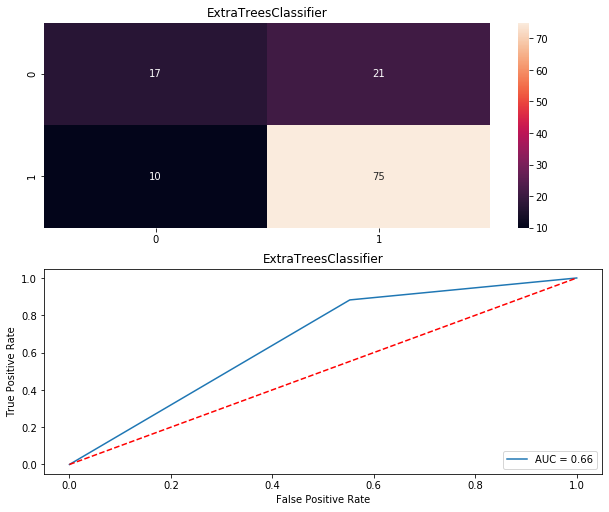

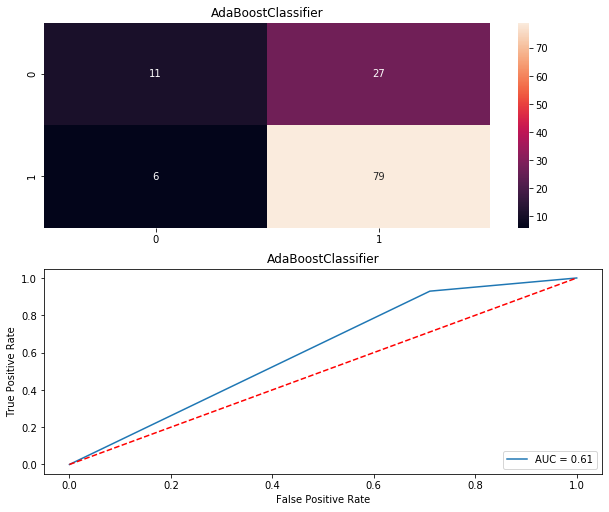

In [44]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [45]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,75.609756,77.863564,62.708978
1,SVC,76.422764,80.142782,62.569659
2,LogisticRegression,74.796748,79.489688,62.120743
3,DecisionTreeClassifier,68.292683,69.516129,61.780186
4,GaussianNB,71.544715,75.261766,62.678019
5,RandomForestClassifier,72.357724,76.052353,60.356037
6,GradientBoostingClassifier,73.170732,75.729773,60.944272
7,ExtraTreesClassifier,74.796748,75.063458,66.486068
8,AdaBoostClassifier,73.170732,75.248546,60.944272


Second Method 


drop the missing value

In [46]:
lp1=pd.read_csv('loan prediction.csv')

In [47]:
lp1.dropna(inplace=True)

lp1.shape

(480, 13)

In [48]:
lp1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [49]:
lp1.drop(['Loan_ID'],axis=1,inplace=True)

In [50]:
#lets impute the object datatype columns by mode groupped by same target class
for col in lp.columns:
    if lp[col].dtype=="object" and lp[col].isnull().sum()>0:
        lp.loc[df_loan["Loan_Status"]=="Y",[col]]=lp.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(lp.loc[lp["Loan_Status"]=="Y",[col]].mode().iloc[0])
        lp.loc[df_loan["Loan_Status"]=="N",[col]]=lp.loc[df_loan["Loan_Status"]=="N",[col]].fillna(lp.loc[lp["Loan_Status"]=="N",[col]].mode().iloc[0])

In [51]:
#Loan amount can be imputed by mean grouped by classes
lp.loc[lp["Loan_Status"]=="Y",["LoanAmount"]]=lp.loc[lp["Loan_Status"]=="Y",["LoanAmount"]].fillna(lp.loc[lp["Loan_Status"]=="Y",["LoanAmount"]].mean())
lp.loc[lp["Loan_Status"]=="N",["LoanAmount"]]=lp.loc[lp["Loan_Status"]=="N",["LoanAmount"]].fillna(lp.loc[lp["Loan_Status"]=="N",["LoanAmount"]].mean())

In [52]:
#Lets impute rest of the columns with mode as they seem to be of categorical type
for col in lp.columns:
    if lp[col].isnull().sum()>0:
        lp.loc[lp["Loan_Status"]=="Y",[col]]=lp.loc[lp["Loan_Status"]=="Y",[col]].fillna(lp.loc[lp["Loan_Status"]=="Y",[col]].mode().iloc[0])
        lp.loc[lp["Loan_Status"]=="N",[col]]=lp.loc[lp["Loan_Status"]=="N",[col]].fillna(lp.loc[lp["Loan_Status"]=="N",[col]].mode().iloc[0])

In [53]:
lp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lp1['Married']=le.fit_transform(lp1['Married'])
lp1['Gender']=le.fit_transform(lp1['Gender'])
lp1['Education']=le.fit_transform(lp1['Education'])
lp1['Self_Employed']=le.fit_transform(lp1['Self_Employed'])
lp1['Loan_Status']=le.fit_transform(lp1['Loan_Status'])

In [55]:
lp1= pd.get_dummies(lp1, drop_first=True)

In [56]:
lp1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1


In [57]:
x=lp1.drop(['Loan_Status'],axis=1)
x.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,0,1,0,0,1


In [58]:

y=lp1['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65,stratify=y)

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.6458333333333334


Cross_Val_Score =  0.6479166666666666


roc_auc_score =  0.5151515151515151


classification_report
               precision    recall  f1-score   support

           0       0.36      0.17      0.23        30
           1       0.70      0.86      0.77        66

    accuracy                           0.65        96
   macro avg       0.53      0.52      0.50        96
weighted avg       0.59      0.65      0.60        96



[[ 5 25]
 [ 9 57]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
 

AxesSubplot(0.125,0.808774;0.62x0.0712264)





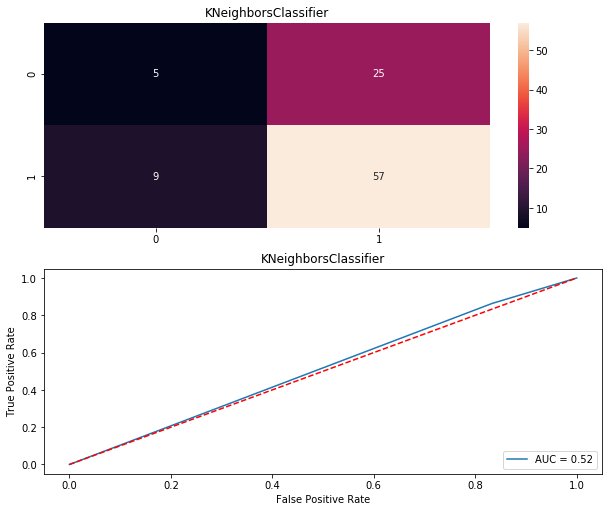

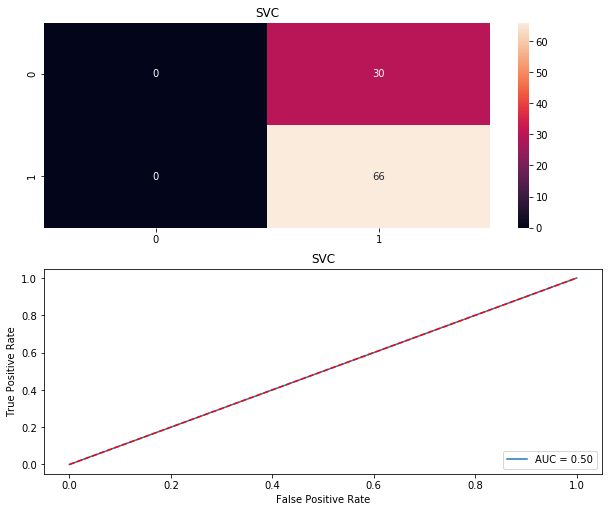

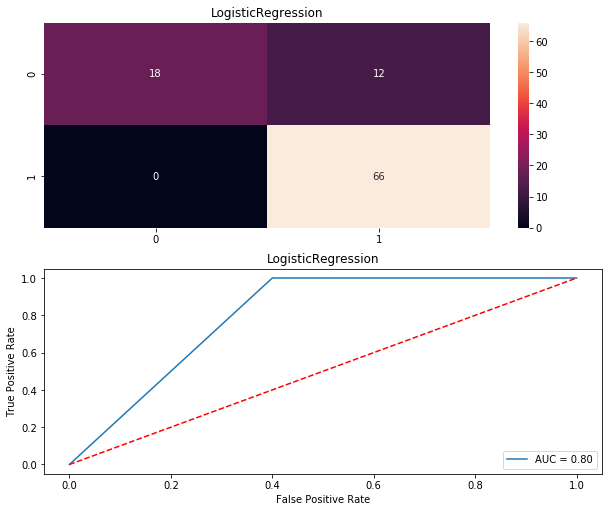

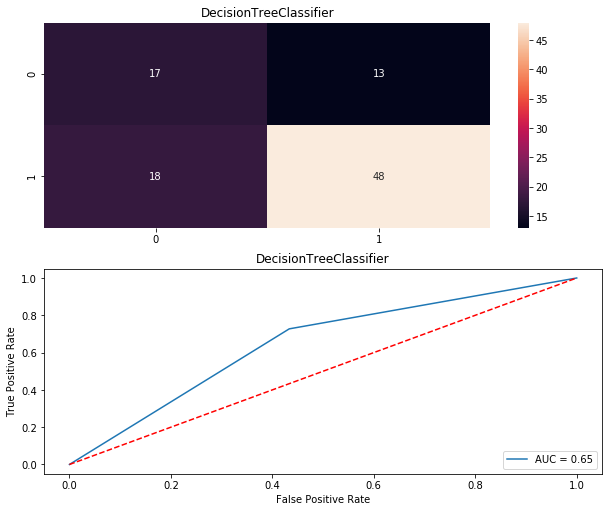

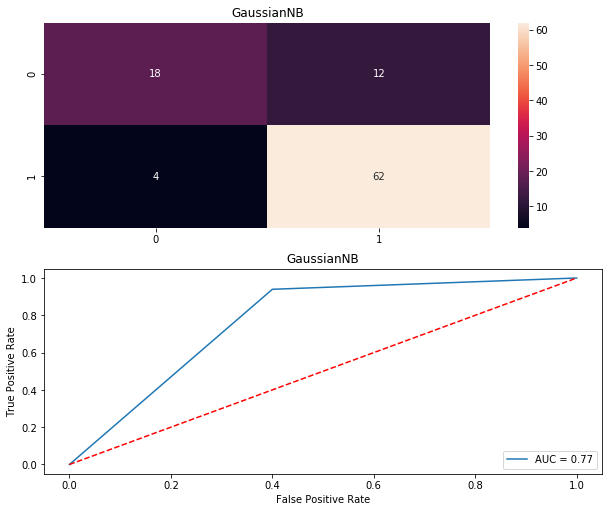

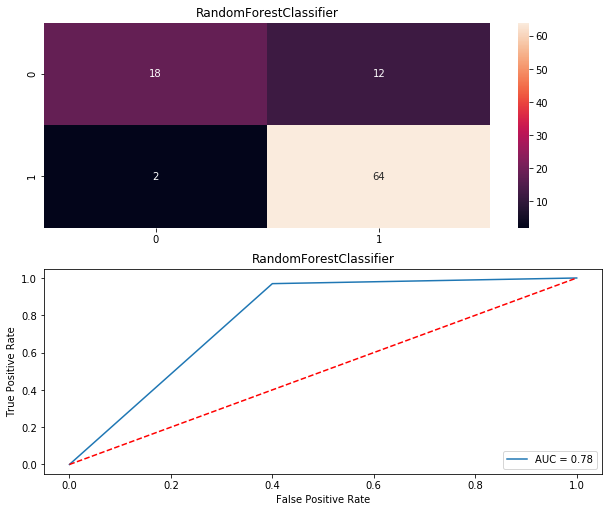

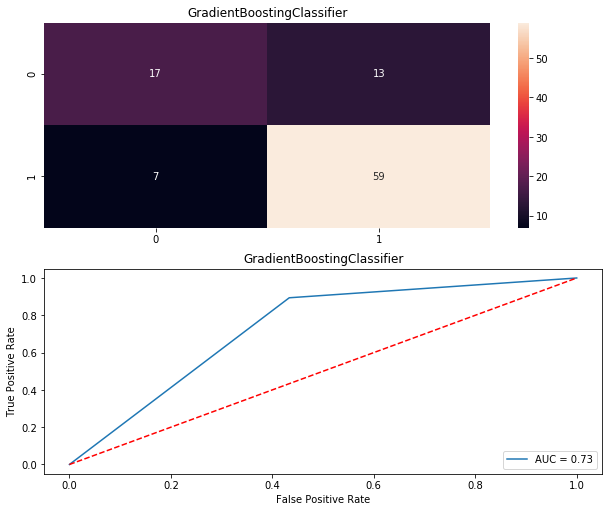

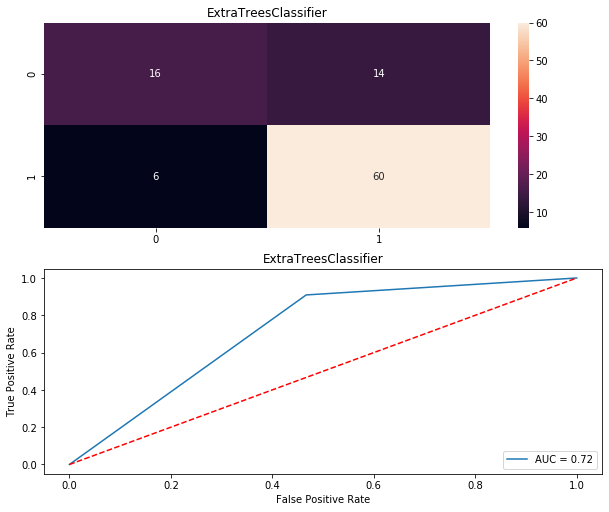

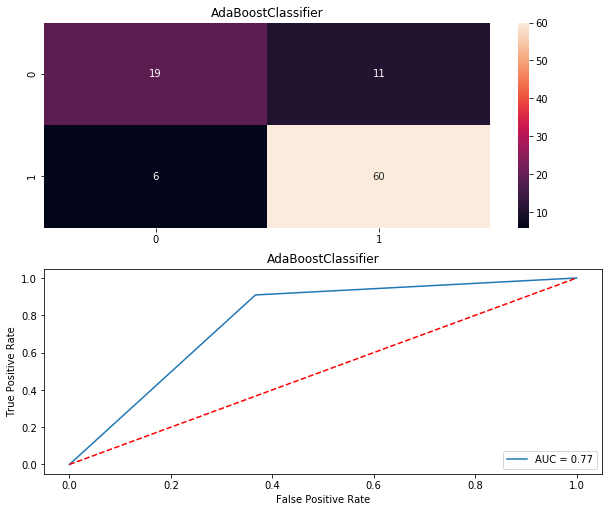

In [60]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [61]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,64.583333,64.791667,51.515152
1,SVC,68.750000,68.958333,50.000000
2,LogisticRegression,87.500000,80.416667,80.000000
3,DecisionTreeClassifier,67.708333,71.666667,64.696970
4,GaussianNB,83.333333,78.541667,76.969697
5,RandomForestClassifier,85.416667,78.958333,78.484848
6,GradientBoostingClassifier,79.166667,77.916667,73.030303
7,ExtraTreesClassifier,79.166667,75.416667,72.121212
8,AdaBoostClassifier,82.291667,78.541667,77.121212


I choose Logistic Regression as my final model because it perform very well on your dataset

Accuracy_score = 87.500000	

Cross_val_score = 80.416667	

Roc_auc_curve = 80.000000

Here for me the second method gave more accurate score ie, drop the missing value.

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,pre))
print("f1 score is : ",f1_score(y_test,pre))
print("classification report \n",classification_report(y_test,pre))
print("AUC ROC Score: ",roc_auc_score(y_test,pre))

Confusion matrix 
 [[19 11]
 [ 6 60]]
f1 score is :  0.8759124087591241
classification report 
               precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.85      0.91      0.88        66

    accuracy                           0.82        96
   macro avg       0.80      0.77      0.78        96
weighted avg       0.82      0.82      0.82        96

AUC ROC Score:  0.7712121212121211


In [65]:
from sklearn.externals import joblib

joblib.dump(RFC,'Model_FraudLonePrediction.pkl')

['Model_FraudLonePrediction.pkl']